In [1]:
#imports
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
#cleaning
movies_df = pd.read_csv('./movies_metadata.csv', low_memory=False) 
movies_df.replace([np.inf, -np.inf], np.nan, inplace=True)
movies_df.dropna(how="all", inplace=True)

In [4]:
#partition
movies_df = movies_df[['title', 'release_date', 'runtime', 'vote_average', 'vote_count']]
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], errors='coerce')
movies_df.head()

,title,release_date,runtime,vote_average,vote_count
0,Toy Story,1995-10-30,81.0,7.7,5415.0
1,Jumanji,1995-12-15,104.0,6.9,2413.0
2,Grumpier Old Men,1995-12-22,101.0,6.5,92.0
3,Waiting to Exhale,1995-12-22,127.0,6.1,34.0
4,Father of the Bride Part II,1995-02-10,106.0,5.7,173.0


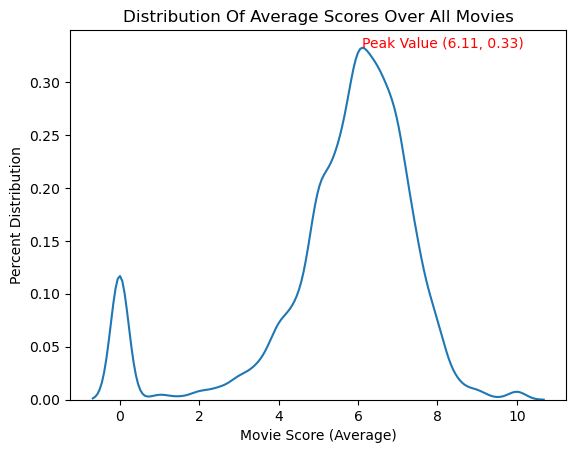

In [5]:
p = sns.kdeplot(data=movies_df, x='vote_average')
p.set(title="Distribution Of Average Scores Over All Movies", xlabel="Movie Score (Average)", ylabel="Percent Distribution")
# get peak of graph
x_points = p.lines[0].get_xdata()
y_points = p.lines[0].get_ydata()
peakIndex = np.argmax(y_points)
peakValue = (x_points[peakIndex],y_points[peakIndex])
#---
p.annotate(text=f"Peak Value {round(peakValue[0],2), round(peakValue[1],2)}", xy=peakValue, color='red')
plt.show()

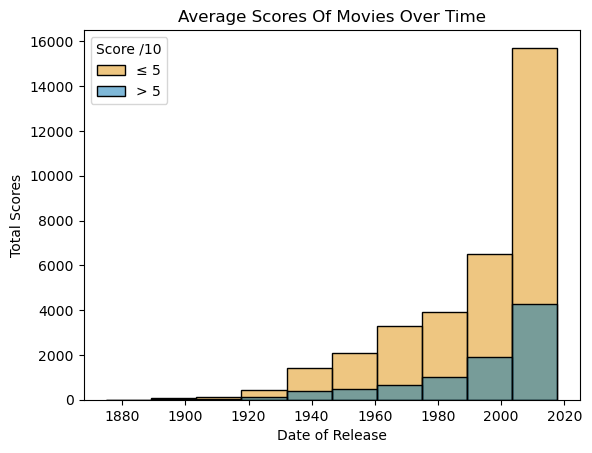

In [6]:
vote_average_bins = pd.cut(movies_df['vote_average'], [0, 5, 10])
movies_df.insert(0, "vote_average_bins", vote_average_bins)
p = sns.histplot(data=movies_df, x='release_date', fill=True, hue='vote_average_bins', palette='colorblind', bins=10)
p.set(title="Average Scores Of Movies Over Time", xlabel="Date of Release", ylabel="Total Scores")
plt.legend(title='Score /10', loc='upper left', labels=["≤ 5", "> 5"])
plt.show()

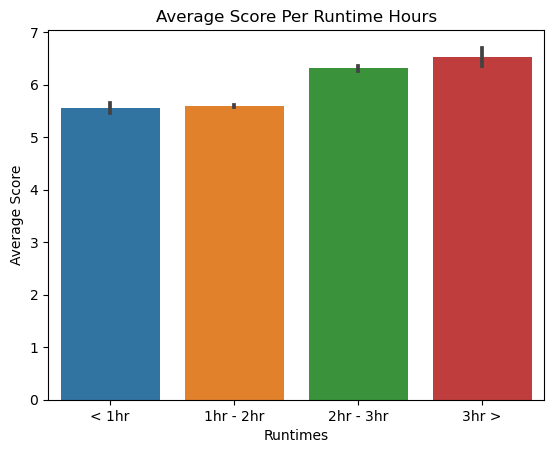

In [7]:
runtime_bins = pd.cut(movies_df['runtime'], [0, 60, 120, 180,float("inf")], labels=["< 1hr", "1hr - 2hr", "2hr - 3hr", "3hr >"])
movies_df.insert(0, "runtime_bins", runtime_bins)
p = sns.barplot(data=movies_df, x='runtime_bins', y='vote_average')
p.set(title="Average Score Per Runtime Hours", xlabel="Runtimes", ylabel="Average Score")
plt.show()

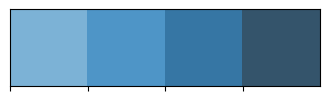

In [8]:
#more relevant custom color palette
ltdBlue4 = sns.color_palette("Blues_d", n_colors=4)
sns.palplot(ltdBlue4)

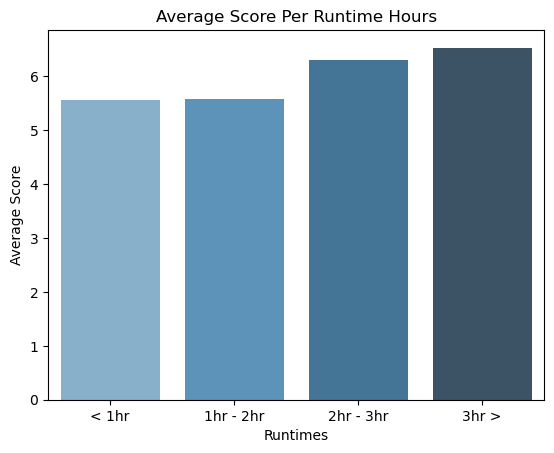

In [9]:
p = sns.barplot(data=movies_df, x='runtime_bins', y='vote_average', errorbar=None, palette=ltdBlue4)
p.set(title="Average Score Per Runtime Hours", xlabel="Runtimes", ylabel="Average Score")
plt.show()

In [11]:
release_date_bins = pd.cut(movies_df['release_date'], 20, labels=False)
movies_df.insert(0, "release_date_bins", release_date_bins)
p = sns.lineplot(data=movies_df, x='release_date_bins', y='vote_average', linewidth=3, palette='colorblind')
p.set(title="Average Score Over Release Dates (split in 20 equal pieces)", xlabel="Movie Release Dates", ylabel="Average Score", xticklabels=[])
p.tick_params(bottom=False)
plt.show()

ValueError: cannot insert release_date_bins, already exists

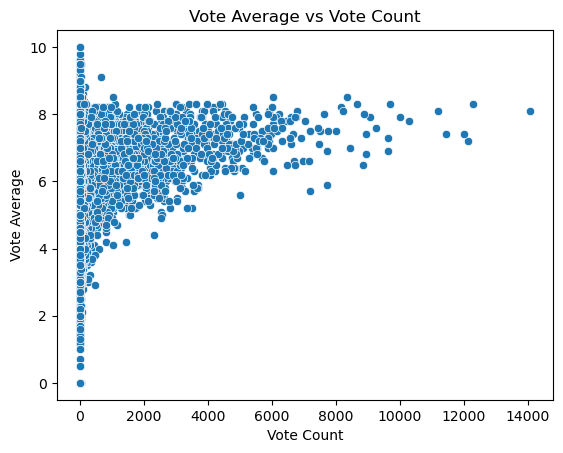

In [23]:
p = sns.scatterplot(data=movies_df, x='vote_count', y='vote_average')
p.set(title="Vote Average vs Vote Count", xlabel="Vote Count", ylabel="Vote Average")
plt.show()